### Exploration & Data Loading

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
path = Path.cwd().parent / "data" / "raw" / "diabetes_prediction_dataset.csv"
df = pd.read_csv(path)
df.shape

(100000, 9)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       99982 non-null  int64  
 1   age                          99982 non-null  float64
 2   hypertension                 99982 non-null  int64  
 3   heart_disease                99982 non-null  int64  
 4   bmi                          99982 non-null  float64
 5   HbA1c_level                  99982 non-null  float64
 6   blood_glucose_level          99982 non-null  int64  
 7   diabetes                     99982 non-null  int64  
 8   smoking_history_current      99982 non-null  bool   
 9   smoking_history_ever         99982 non-null  bool   
 10  smoking_history_former       99982 non-null  bool   
 11  smoking_history_never        99982 non-null  bool   
 12  smoking_history_not current  99982 non-null  bool   
dtypes: bool(5), float64(3

##### Analysing "gender" column

In [5]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

A coluna `gender` por padrão tem 3 valores únicos: Male, Female e Other. Como a quantidade de "Other" é bem reduzida perto da base de dados e não conseguimos inferir esta informação, optamos por retirar estas linhas para podermos lidar como uma coluna binária.

In [6]:
df = df.drop(df[df["gender"] == "Other"].index)
df["gender"].value_counts()


gender
Female    58552
Male      41430
Name: count, dtype: int64

### Binary Encoding

In [7]:
binary_cols = ['gender']

In [8]:
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({"Male": 1, "Female": 0}))

In [9]:
df['gender'].value_counts()

gender
0    58552
1    41430
Name: count, dtype: int64

#### One-Hot encoding

In [10]:
multi_category_columns = ['smoking_history']

df = pd.get_dummies(df, columns=multi_category_columns, drop_first=True)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,1,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,1,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False


### Correlation Matrix

In [13]:
correlation_matrix = df.corr()
diabetes_correlation = correlation_matrix['diabetes'].sort_values(ascending=False)
print(diabetes_correlation)

diabetes                       1.000000
blood_glucose_level            0.419587
HbA1c_level                    0.400696
age                            0.257999
bmi                            0.214377
hypertension                   0.197811
heart_disease                  0.171718
smoking_history_former         0.097901
gender                         0.037623
smoking_history_never          0.027248
smoking_history_ever           0.024088
smoking_history_not current    0.020831
smoking_history_current        0.019588
Name: diabetes, dtype: float64


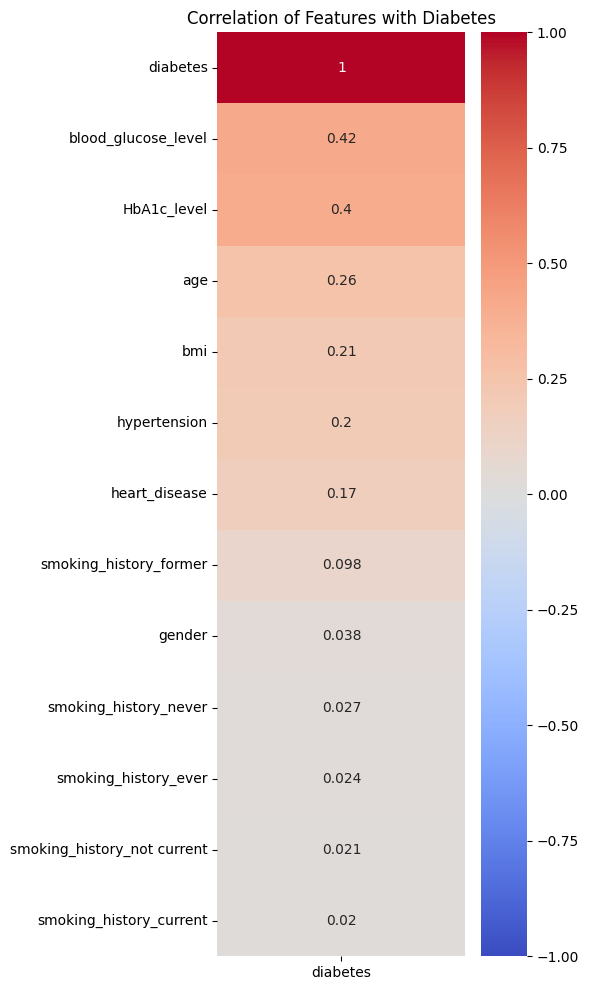

In [16]:
correlation_matrix = df.corr(numeric_only=True)

diabetes_correlation = correlation_matrix[['diabetes']].sort_values(by='diabetes', ascending=False)

plt.figure(figsize=(4, 12))
sns.heatmap(diabetes_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Diabetes')
plt.show()

#### Machine Learning

In [18]:
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.914985
1    0.085015
Name: proportion, dtype: float64

Claramente, podemos notar um problema de desbalanceamento que precisamos resolver.

##### Decision Tree Classifier

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Train set:')
print(y_train.value_counts(normalize=True))
print('Test set:')
print(y_test.value_counts(normalize=True))




Train set:
diabetes
0    0.914984
1    0.085016
Name: proportion, dtype: float64
Test set:
diabetes
0    0.914987
1    0.085013
Name: proportion, dtype: float64


In [44]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

In [45]:
decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18297
           1       0.70      0.74      0.72      1700

    accuracy                           0.95     19997
   macro avg       0.84      0.86      0.85     19997
weighted avg       0.95      0.95      0.95     19997



In [36]:
print(confusion_matrix(y_test, y_pred))

[[18297     0]
 [  556  1144]]


[Text(0.5714285714285714, 0.9285714285714286, 'x[5] <= 6.7\ngini = 0.156\nsamples = 79985\nvalue = [73185, 6800]'),
 Text(0.42857142857142855, 0.7857142857142857, 'x[6] <= 210.0\ngini = 0.091\nsamples = 76878\nvalue = [73185.0, 3693.0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.2857142857142857, 0.6428571428571429, 'x[1] <= 53.5\ngini = 0.058\nsamples = 75442\nvalue = [73185, 2257]'),
 Text(0.14285714285714285, 0.5, 'gini = 0.024\nsamples = 51670\nvalue = [51038, 632]'),
 Text(0.42857142857142855, 0.5, 'x[5] <= 5.35\ngini = 0.127\nsamples = 23772\nvalue = [22147, 1625]'),
 Text(0.2857142857142857, 0.35714285714285715, 'gini = 0.0\nsamples = 9119\nvalue = [9119, 0]'),
 Text(0.5714285714285714, 0.35714285714285715, 'x[6] <= 113.0\ngini = 0.197\nsamples = 14653\nvalue = [13028, 1625]'),
 Text(0.42857142857142855, 0.21428571428571427, 'gini = 0.0\nsamples = 3954\nvalue = [3954, 0]'),
 Text(0.7142857142857143, 0.21428571428571427, 'x[4] <= 32.835\ngini = 0.258\nsamples = 10699\nva

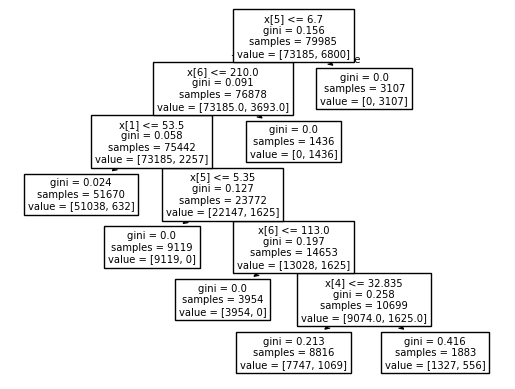

In [41]:
plot_tree(decision_tree_classifier)